# Linear Regression with TensorFlow

1. What is Linear Regression
2. Linear Regression with TensorFlow

### 1. Linear Regression

Defining a linear regression in simple terms, is the approximation of a linear model used to describe the relationship between two or more variables. In a simple linear regression there are two variables, the dependent variable, which can be seen as the "state" or "final goal" that we study and try to predict, and the independent variables, also known as explanatory variables, which can be seen as the "causes" of the "states".

When more than one independent variable is present the process is called multiple linear regression.
When multiple dependent variables are predicted the process is known as multivariate linear regression.

The equation of a simple linear model is:

$Y = aX + b$

Where Y is the dependent variable and X is the independent variable, and a and b being the parameters we adjust. a is known as "slope" or "gradient" and b is the "intercept". You can interpret this equation as Y being a function of X, or Y being dependent on X.

If you plot the model, you will see it is a line, and by adjusting the "slope" parameter you will change the angle between the line and the independent variable axis, and the "intercept parameter" will affect where it crosses the dependent variable's axis.

Let's first impori the required packages

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

Let's define the independent variable

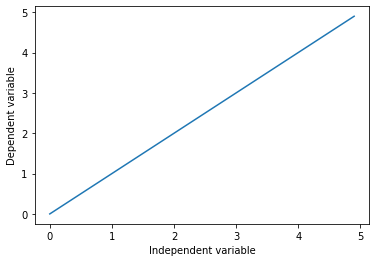

In [ ]:
x = np.arange(0, 5, 0.1)
a = 1
b = 0

y = a * x + b

plt.plot(x, y)
plt.ylabel("Dependent variable")
plt.xlabel("Independent variable")
plt.show()

Simple linear relations were used to try to describe and quantify many observable physical phenomena, the easiest to understand are speed and distance traveled:

* $DistanceTraveled = SpeedTime*Time + InitialDistance$
* $Speed = Acceleration * Time + InitialSpeed$

When we perform an experiment and gather the data, or if we already have a dataset and we want to perform a linear regression, what we will do is adjust a simple linear model to the dataset, we adjust the "slope" and "intercept" parameters to the data the best way possible, because the closer the model comes to describing each ocurrence, the better it will be at representing them.

### 2. Linear Regression with TensorFLow

For the first part we will use a sample dataset, and then we'll use TensorFlow to adjust and get the right parameters. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars.

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2022-04-15 13:47:21--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   419KB/s    in 0.2s    

2022-04-15 13:47:22 (419 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



**Understanding the data**

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [ ]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Let's say we want to use linear Regression to predict CO2 emission of cars based on their engine size.

Define the parameters X, and Y

In [ ]:
x_train = np.asanyarray(df["ENGINESIZE"])
y_train = np.asanyarray(df["CO2EMISSIONS"])

First, we initializr the variable a and b, with any random guess, and the we define the linear function

In [ ]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)

def h_linear_regression(x):
  y = a * x + b
  return y

Now, we are going to define a **loss function** for our regression, so we can train our model to better fit our data. In a linear regression, we minimize the squared error of the difference between the predicted values(obtained from the equation) and the target values (the data that we have). In other words we want to **minimize the square of the predicted values minus the target value.** So we define the equation to be minimized as loss.

To find value of our loss, we use `tf.reduce_mean()`. This function finds the mean of a multidimensional tensor, and the result can have a different dimension.

In [ ]:
def loss_object(y, y_train):
  return tf.reduce_mean(tf.square(y - y_train))

Now we are ready to start training and run the graph. We use GradientTape to calculate gradients:

In [ ]:
learning_rate = 0.01
train_data = []
loss_values = []
a_values = []
b_values = []

training_epochs = 200

for epoch in range(training_epochs):
  with tf.GradientTape() as tape:
    y_predicted = h_linear_regression(x_train)
    loss_value = loss_object(y_train, y_predicted)
    loss_values.append(loss_value)

    #get gradients
    gradients = tape.gradient(loss_values, [b, a])

    #Compute and adjus weights
    a_values.append(a.numpy())
    b_values.append(b.numpy())
    b.assign_sub(gradients[0] * learning_rate)
    a.assign_sub(gradients[1] * learning_rate)

    if epoch % 5 == 0:
      train_data.append([a.numpy(), b.numpy()])

Lets plot the loss values to see how it has changed during the training:

Text(0, 0.5, 'Loss')

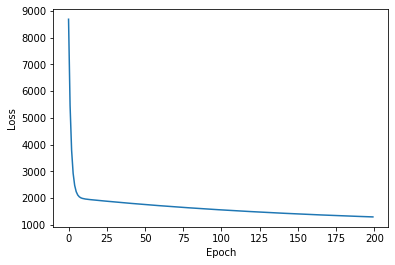

In [ ]:
plt.plot(loss_values)
plt.xlabel("Epoch")
plt.ylabel("Loss")

Lets visualize how the coefficient and intercept of line has changed to fit the data:

[]

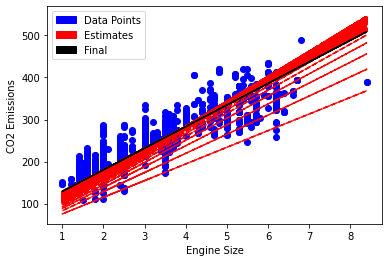

In [ ]:
plt.scatter(x_train, y_train ,color = "b")
for a, b in zip(a_values[:], b_values[:]):
    plt.plot(x_train, a * x_train + b, color='red', linestyle='dashed')
plt.plot(x_train, a_values[-1] * x_train + b_values[-1], color='black')

final = mpatches.Patch(color='Black', label='Final')
estimates = mpatches.Patch(color='Red', label='Estimates')
data = mpatches.Patch(color='Blue', label='Data Points')

plt.legend(handles=[data, estimates, final])

plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.plot()